In [57]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import datetime
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

import h5py
import datetime as dt

In [2]:
FILE_NAME = 'MLS-Aura_L2GP-H2O_v04-23-c01_2019d365.he5'
file = h5py.File(FILE_NAME, 'r')

In [41]:
dset = file['HDFEOS']['SWATHS']['H2O']['Data Fields']['H2O']
data_h2o = dset[:, :]
dset = file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Latitude']
data_lat = dset[:]
dset = file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Longitude']
data_lon = dset[:]
dset = file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Pressure']
data_pres = dset[:]
dset = file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Time']
data_time = FILE_NAME
dt_ = datetime.datetime.strptime(data_time[29:33]+"0101", '%Y%m%d') + datetime.timedelta(days=int(data_time[34:37])) - datetime.timedelta(days=1)


In [70]:
print(data_lat.shape, data_lon.shape, data_pres.shape)

(3495,) (3495,) (55,)


In [141]:
grid_x, grid_y = np.mgrid[-180:180:0.1, -82:82:0.1]

In [142]:
points = np.random.rand(data_lat.shape[0], 2)
points[:,0] = data_lon[:]
points[:,1] = data_lat[:]
values = data_h2o[:,12] 

In [147]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')*10e6
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')*10e6
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')*10e6

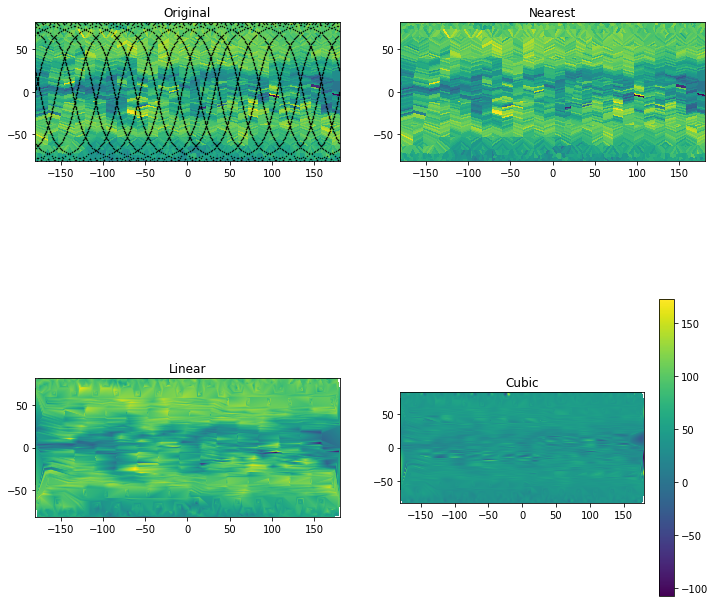

In [148]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(grid_z0.T, extent=(-180,180,-82,82), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(-180,180,-82,82), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(-180,180,-82,82), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(-180,180,-82,82), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(12, 12)
plt.colorbar()
plt.show()